In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [125]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import time

In [5]:
df=pd.read_csv("C:/Users/bhara/Downloads/AMZN.csv")
df.head()

,Date,Open,High,Low,Adj Close,Volume,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,Fourier,ARIMA,Close,labels
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.899994,NaN
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.690002,NaN
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.250000,NaN
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,130.000000,NaN
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.520004,NaN


In [7]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'ma7', 'ma21',
       '26ema', '12ema', 'MACD', '20sd', 'upper_band', 'lower_band', 'ema',
       'momentum', 'Fourier', 'ARIMA', 'Close', 'labels'],
      dtype='object')

In [9]:
df=df[['Date', 'Open', 'High', 'Low', 'Adj Close', 'Volume', 'Close']]

In [11]:
df.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [13]:
df_close = df['Close']
df_close.shape

(2265,)

In [19]:
df_close = df_close.values.reshape(2265,1)

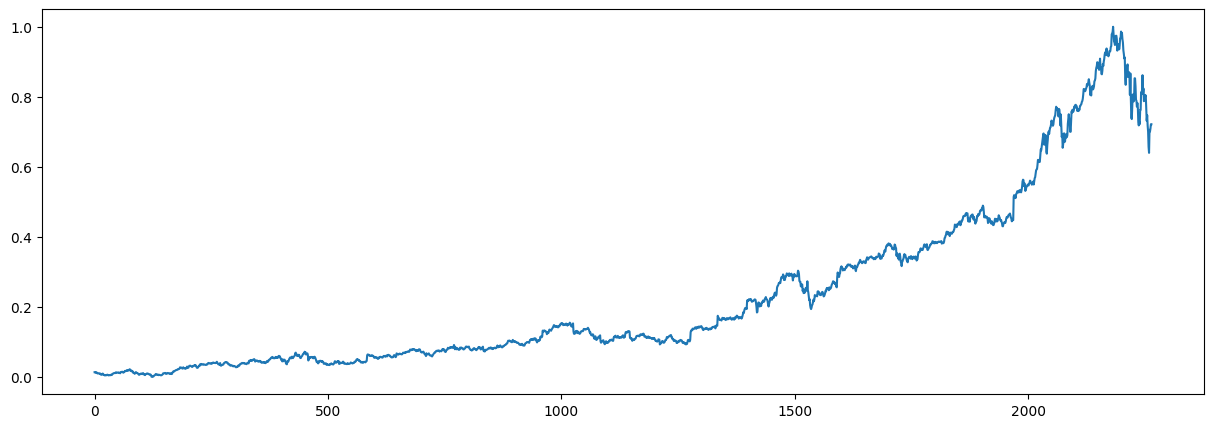

In [27]:
from sklearn.preprocessing import MinMaxScaler
plt.figure(figsize=(15,5))
plt.plot(df_close)
plt.show()

sc = MinMaxScaler()
df_close = sc.fit_transform(df_close)


In [47]:
trainsize = int(0.75*(df_close.shape[0]))
train = df_close[:trainsize,:]
test = df_close[trainsize:,:]



In [49]:
trainsize

1698

In [51]:
train

array([[0.01309752],
       [0.01350666],
       [0.01224299],
       ...,
       [0.36640944],
       [0.37294006],
       [0.37311098]])

In [53]:
test

array([[0.37738878],
       [0.37709358],
       [0.37569011],
       [0.38103992],
       [0.3796416 ],
       [0.37848671],
       [0.37966752],
       [0.37412087],
       [0.37572118],
       [0.37323011],
       [0.36995702],
       [0.36477291],
       [0.36720701],
       [0.36722772],
       [0.36341085],
       [0.36790097],
       [0.37779275],
       [0.37628566],
       [0.36976541],
       [0.3675747 ],
       [0.34580248],
       [0.35279404],
       [0.35051011],
       [0.34022994],
       [0.34099126],
       [0.33478688],
       [0.35026153],
       [0.35172199],
       [0.34350303],
       [0.32822518],
       [0.32647988],
       [0.31615309],
       [0.32867056],
       [0.33035371],
       [0.33548605],
       [0.33743331],
       [0.34770832],
       [0.3504687 ],
       [0.34777047],
       [0.34789994],
       [0.3408566 ],
       [0.33865556],
       [0.33246673],
       [0.32888291],
       [0.32716869],
       [0.337019  ],
       [0.3397949 ],
       [0.342

In [171]:
def create_dataset(df,look_back):
    X,y = [],[]
    for i in range(len(df)-look_back):
        X.append(df[i:i+look_back,:])
        y.append(df[i+look_back,:])
    return np.array(X),np.array(y)

In [193]:
trainX,trainy = create_dataset(train,4)
testX,testy = create_dataset(test,4)

In [195]:
trainX.shape, trainy.shape,testX.shape,testy.shape

((1694, 4, 1), (1694, 1), (563, 4, 1), (563, 1))

In [197]:
trainX = trainX.reshape(-1,4,trainX.shape[1])
testX = testX.reshape(-1,4,testX.shape[1])

ValueError: cannot reshape array of size 6776 into shape (4,4)

In [117]:
trainX.shape

(1694, 4, 1)

In [119]:
testX.shape

(563, 4, 1)

In [149]:
def modelcreation(i):
    model = Sequential()
    model.add(LSTM(units = 50,input_shape=(i,1),return_sequences=True,dropout=0.2))
    model.add(LSTM(units = 50,dropout=0.2))
    model.add(Dense(units=1))
    model.add(Activation('relu'))
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])

    return model

In [129]:
model.fit(trainX,trainy,batch_size=128,epochs=50,validation_split=0.1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - loss: 0.0098 - mae: 0.0773 - val_loss: 0.0398 - val_mae: 0.1943
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0039 - mae: 0.0481 - val_loss: 0.0357 - val_mae: 0.1841
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - mae: 0.0460 - val_loss: 0.0350 - val_mae: 0.1829
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0031 - mae: 0.0425 - val_loss: 0.0254 - val_mae: 0.1552
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0028 - mae: 0.0401 - val_loss: 0.0221 - val_mae: 0.1447
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - mae: 0.0374 - val_loss: 0.0178 - val_mae: 0.1300
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0022 - mae: 0.0346 - val_loss: 0.0152 - val_mae: 0.1202
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0022 - mae: 0.0332 - val_loss: 0.0137 - val_mae: 0.1143
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.00

In [135]:
preds = model.predict(testX)
preds

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step 


array([[0.255571  ],
       [0.25590497],
       [0.2562499 ],
       [0.2569116 ],
       [0.25614846],
       [0.25551015],
       [0.2548012 ],
       [0.25344855],
       [0.25240985],
       [0.25091627],
       [0.2498115 ],
       [0.24896275],
       [0.24926294],
       [0.25012243],
       [0.2514317 ],
       [0.25309458],
       [0.25350553],
       [0.24993987],
       [0.24600635],
       [0.24276398],
       [0.23883575],
       [0.23833846],
       [0.23578246],
       [0.2345752 ],
       [0.23595543],
       [0.2369098 ],
       [0.23742485],
       [0.23404147],
       [0.22888723],
       [0.22554009],
       [0.22539647],
       [0.22632708],
       [0.22971901],
       [0.23204483],
       [0.23495185],
       [0.23715574],
       [0.23907986],
       [0.23852214],
       [0.23689237],
       [0.23489447],
       [0.23210071],
       [0.23003039],
       [0.22895777],
       [0.22964653],
       [0.23162627],
       [0.23411103],
       [0.23493454],
       [0.234

In [139]:
testy.shape

(563, 1)

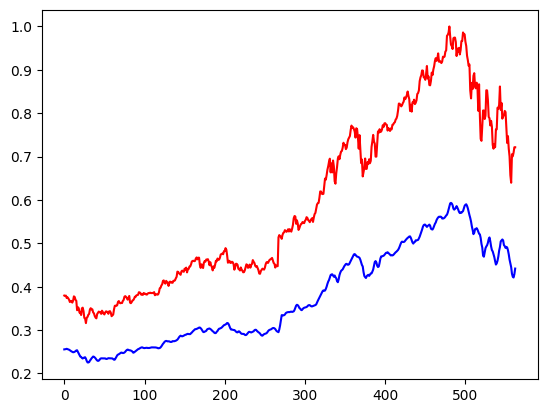

In [141]:

plt.plot(testy,color='r')
plt.plot(preds,color='b')
plt
plt.show()

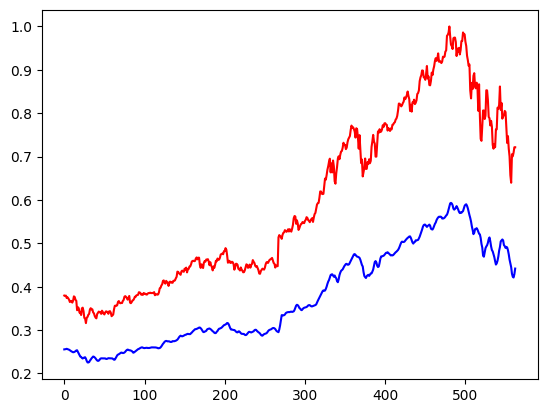

In [143]:
plt.plot(testy,color='r')
plt.plot(preds.flatten(),color='b')
plt
plt.show()

(1697, 1, 1) (1697, 1) (566, 1, 1) (566, 1)


C:\Users\bhara\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 1, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0088 - mae: 0.0707 - val_loss: 0.0528 - val_mae: 0.2252
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0044 - mae: 0.0490 - val_loss: 0.0437 - val_mae: 0.2041
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040 - mae: 0.0483 - val_loss: 0.0415 - val_mae: 0.1989
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0042 - mae: 0.0505 - val_loss: 0.0435 - val_mae: 0.2038
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0042 - mae: 0.0490 - val_loss: 0.0418 - val_mae: 0.1995
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041 - mae: 0.0488 - val_loss: 0.0389 - val_mae: 0.1923
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0041 - mae: 0.0496 - val_loss: 0.0395 - val_mae: 0.1939
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0038 - mae: 0.0476 - val_loss: 0.0403 - val_mae: 0.1960
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.003

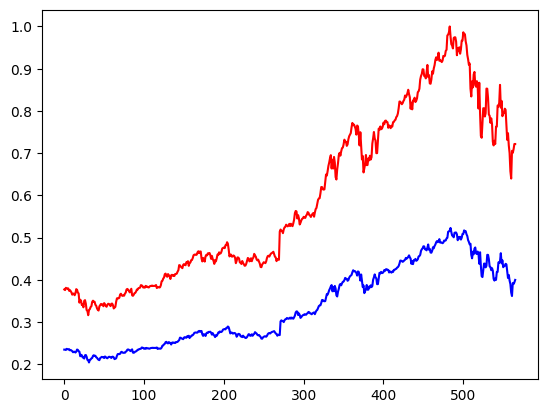

(1696, 2, 1) (1696, 1) (565, 2, 1) (565, 1)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_10 (LSTM)                  │ (None, 2, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 100ms/step - loss: 0.0089 - mae: 0.0713 - val_loss: 0.0503 - val_mae: 0.2195
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046 - mae: 0.0510 - val_loss: 0.0434 - val_mae: 0.2033
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0399 - val_mae: 0.1947
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0040 - mae: 0.0494 - val_loss: 0.0404 - val_mae: 0.1960
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - mae: 0.0487 - val_loss: 0.0416 - val_mae: 0.1993
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041 - mae: 0.0490 - val_loss: 0.0389 - val_mae: 0.1923
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0036 - mae: 0.0464 - val_loss: 0.0412 - val_mae: 0.1984
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0039 - mae: 0.0474 - val_loss: 0.0360 - val_mae: 0.1849
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.00

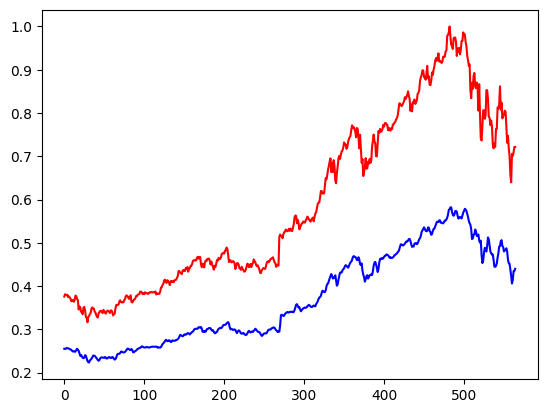

(1695, 3, 1) (1695, 1) (564, 3, 1) (564, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            51 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 104ms/step - loss: 0.0067 - mae: 0.0600 - val_loss: 0.0370 - val_mae: 0.1874
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0037 - mae: 0.0470 - val_loss: 0.0349 - val_mae: 0.1820
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0035 - mae: 0.0457 - val_loss: 0.0349 - val_mae: 0.1824
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0030 - mae: 0.0422 - val_loss: 0.0285 - val_mae: 0.1644
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0029 - mae: 0.0419 - val_loss: 0.0286 - val_mae: 0.1651
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026 - mae: 0.0399 - val_loss: 0.0236 - val_mae: 0.1498
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024 - mae: 0.0373 - val_loss: 0.0182 - val_mae: 0.1310
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0023 - mae: 0.0354 - val_loss: 0.0200 - val_mae: 0.1383
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.00

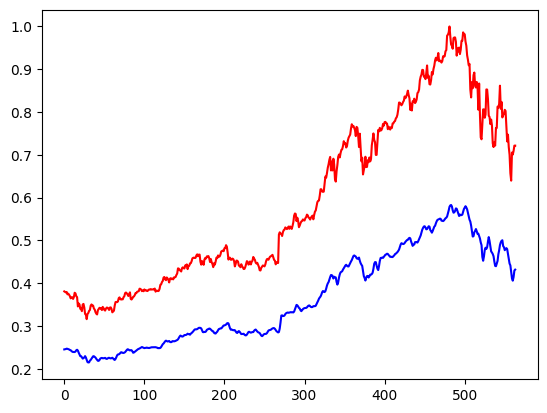

In [199]:
for i in range(1,4):

    trainX,trainy = create_dataset(train,i)
    testX,testy = create_dataset(test,i)

    print(trainX.shape, trainy.shape,testX.shape,testy.shape)

    # trainX = trainX.reshape(-1,i,trainX.shape[1])
    # testX = testX.reshape(-1,i,testX.shape[1])

    model = modelcreation(i)

    model.summary()

    model.fit(trainX,trainy,batch_size=128,epochs=50,validation_split=0.1)

    preds = model.predict(testX)

    plt.plot(testy,color='r')
    plt.plot(preds,color='b')
    plt
    plt.show()
        